## Урок 5

### Проверка статистических гипотез. P-значения. Доверительные интервалы. A/B-тестирование

__Статистическая гипотеза__ — предположение о виде распределения и свойствах случайной величины, которое можно подтвердить или опровергнуть.

Различают _нулевые_ и _альтернативные_ гипотезы.

На практике обычно требуется проверить какую-то конкретную гипотезу $H_0$. Такую гипотезу принято называть __нулевой__. Нулевая гипотеза считается истинной, пока не доказано обратное. Параллельно рассматривается противоречащая ей гипотеза $H_1$, называемая __альтернативной__ или _конкурирующей_.

__Пример 1__

Имеется станок, изготавливающий шарики для подшипников, который настроен делать шарики с диаметром $1$ мм. На основании выборки из значений диаметров таких шариков мы можем проверить, правильно ли станок откалиброван (т.е. делает ли он такие шарики, которые он настроен делать). 

В таком случае в качестве нулевой гипотезы $H_0$ берётся гипотеза о том, что математическое ожидание диаметра шарика равно $1$ мм.


### Проверка гипотез

Задача проверки гипотез в том, чтобы проверить, случайно ли отклонение результатов измерения. Если отличия результатов измерения от значений, соответствующих нулевой гипотезе, случайны, нулевая гипотеза остается в силе. Если же результаты измерения значительно отличаются от того, что утверждается в нулевой гипотезе, то принимают альтернативную.

__Этапы проверки гипотез__

1. Формулируются нулевая и альтернативная гипотезы.
2. Задаётся некоторая функция $T$ от выборки, для которой в условиях справедливости нулевой гипотезы $H_0$ известна функция распределения $F_T(x) = P(T < x)$.
3. Фиксируется уровень значимости $\alpha$ — допустимая для данной задачи вероятность _ошибки первого рода_ (чаще всего 0.01, 0.05 или 0.1).
4. Определяется критическая область $\Omega_\alpha$, такая, что $P(T \in \Omega_\alpha | H_0) = \alpha$.
5. Проводится _статистический тест_: для конкретной выборки $X$ считается значение $T(X)$, и если оно принадлежит $\Omega_alpha$, то заключаем, что данные противоречат гипотезе $H_0$, и принимается гипотеза $H_1$.

Ошибки первого и второго рода возникают в задачах, в которых требуется определить, произошло какое-то событие или нет.

__Ошибка первого рода__ (т.н. __false positive__) соответствует ситуации, когда было определено, что событие произошло, тогда как реально оно не произошло.

__Ошибка второго рода__ (т.н. __false negative__) — обратная ситуация: мы определили, что событие не произошло, а реально оно произошло.

В контексте проверки статистических гипотез ошибкой первого рода называются ситуации, когда нулевая гипотеза $H_0$ была отвергнута, тогда как в реальности она верна. 

В свою очередь, ошибка второго рода заключается в том, что нулевая гипотеза ложна, но отвергнута не была.

Низкие значения уровня значимости $\alpha$ уменьшают вероятность совершить ошибку первого рода, однако, вместе с тем увеличивают вероятность совершить ошибку второго рода (т.е. не отвергнуть ложную нулевую гипотезу).

Разберёмся, что представляет из себя критическая область и как она строится. Итак, мы зафиксировали функцию $T$ от выборки, имеющую функцию распределения $F_T(x) = P(T < x)$ (в предположении, что верна нулевая гипотеза), и уровень значимости $\alpha$. Обозначим через $t_\alpha$ значение, для которого $F_T(t_\alpha) = \alpha$.

На практике, как правило, используются функции T с _унимодальной_ (имеющей форму пика) плотностью распределения. __Критические области__ (наименее вероятные значения функции $T$) соответствуют «хвостам» этого распределения. Поэтому чаще всего возникают критические области одного из трёх типов:
* Левосторонняя область: $\Omega_\alpha = (-\infty, t_\alpha)$.
* Правосторонняя область: $\Omega_\alpha = (t_{1 - \alpha}, \infty)$.
* Двусторонняя область: $\Omega_\alpha = (-\infty, t_{\alpha/2}) \cup (t_{1 - \alpha/2}, \infty)$.

Отметим, что описанный выше способ проверять статистические гипотезы не даёт возможности доказать нулевую гипотезу. Мы можем лишь опровергнуть её, наткнувшись на несоответствие в данных, либо принять её. Однако, принятие нами нулевой гипотезы не говорит о том, что она верна, а лишь о том, что мы _достаточно уверены_ в том, что она верна.

__Пример 1 (продолжение)__

Продолжим развивать приведённый выше пример 1. Дана выборка из диаметров подшипников, изготовленных станком.

In [1]:
import numpy as np
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])

Будем считать, что в нашем случае среднее квадратическое отклонение известно и равно $0.25$. Значит, надо использовать статистику
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}},$$
и при условии верности нулевой гипотезы она имеет стандартное нормальное распределение. В нашем случае:
$$Z = \dfrac{\overline{X} - 1}{0.25/ \sqrt{n}}$$

Эта статистика имеет стандартное нормальное распределение, т.е. нормальное распределение с параметрами $\mu = 0$, $\sigma = 1$.
Поскольку альтернативная гипотеза двухсторонняя (мат. ожидание может быть как больше, так и меньше $1$), критическая область также будет двухсторонней. Для её построения нам понадобятся квантили $t_{\alpha / 2}$ и $t_{1 - \alpha / 2}$ стандартного нормального распределения. Найдём их с помощью `scipy.stats`.

In [2]:
def statistic(samples):
    return (samples.mean() - 1) / (0.25 / np.sqrt(samples.shape[0]))

In [3]:
alpha = 0.05

In [4]:
from scipy import stats

In [5]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.9599639845400545, 1.959963984540054)

Итак, критическая область:
$$\Omega_\alpha = (-\infty, -1.96) \cup (1.96, \infty)$$

In [6]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

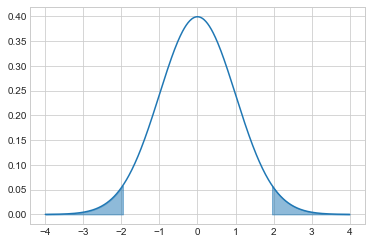

In [7]:
ox = np.linspace(-4, 4, 500)
oy = stats.norm.pdf(ox)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.norm.pdf(ox_left)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.norm.pdf(ox_right)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Проводим статистический тест. Находим знаяение z-статистики по выборке (наблюдаемое значение)

In [8]:
z = statistic(samples)
z

2.1252589504967747

Значение попало в критическую область. Нулевая гипотеза отвергается.

__Пример 2__

В реальности у нас редко есть что-то кроме самой выборки. В частности, дисперсию случайной величины мы скорее всего не знаем. Как мы уже отмечали ранее, в таком случае мы тоже можем провести статистический тест, однако, нам нужно будет для этого взять другую статистику, а именно
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения. В нашем случае это:
$$t = \dfrac{\overline{X} - 1}{\sigma_X / \sqrt{n}}$$

In [9]:
alpha = 0.05
def statistic(samples):
    return (samples.mean() - 1) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

Кроме того, распределение этой статистики тоже будет другое: t-распределение Стьюдента. Значит, квантили тоже придётся считать заново.

In [10]:
n = samples.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-2.068657610419041, 2.0686576104190406)

Итак, теперь критическая область немного шире:
$$\Omega_\alpha = (-\infty, -2.07) \cup (2.07, \infty)$$

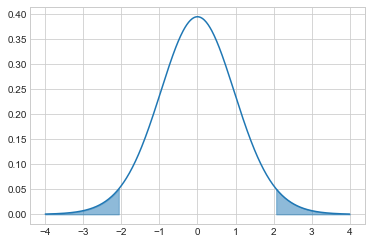

In [11]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Итак, статистический тест:

In [12]:
t = statistic(samples)
t

1.9018640008517087

Значение статистики не попало в критическую область, значит, гипотеза остаётся в силе.

__P-значения__

P-значения позволяют получить результат проверки статистических гипотез сразу для многих уровней значимости. 

Как мы теперь знаем, уменьшение уровня значимости приводит к расширению границ критической области: чем меньше уровень значимости, тем сложнее попасть в критическую область и, как следствие, отвергнуть нулевую гипотезу. __P-значение__ представляет собой наибольшее значение уровня значимости $\alpha$, при котором гипотезу можно принять, т.е. при котором значение статистики, посчитанной по выборке, ещё не попадает в критическую область.

__Пример 3__

В примере 2 мы проверяли гипотезу о математическом ожидании диаметра подшипника. Реализуем этот тест для различных $\alpha$ и посмотрим, как это влияет на результат.

In [13]:
n = samples.shape[0]
S = statistic(samples)

n, S

(24, 1.9018640008517087)

In [14]:
print('alpha\tresult')
print('-------------')

for alpha in np.linspace(0, 0.15, 15):
    t1 = stats.t.ppf(alpha / 2, df=n - 1)
    t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)
    
    print(round(alpha, 4), '\t', t1 <= S <= t2)

alpha	result
-------------
0.0 	 True
0.0107 	 True
0.0214 	 True
0.0321 	 True
0.0429 	 True
0.0536 	 True
0.0643 	 True
0.075 	 False
0.0857 	 False
0.0964 	 False
0.1071 	 False
0.1179 	 False
0.1286 	 False
0.1393 	 False
0.15 	 False


Как мы видим, при малых $\alpha$ имеем довольно широкую критическую область, в которую сложнее попасть. На нескольких первых шагах критическая область достаточно широка, что значение статистики в неё не попадает. Но в какой-то момент критическая область сужается настолько, что поглощает значение статистики. С этого момента гипотеза начинает отвергаться.

P-значением будет то значение $\alpha$, при котором происходит этот переход, т.е. когда одна из границ критической области совпадает со значением статистики.

Пусть $F_S(x)$ — функция распределения рассматриваемой статистики, а $t_{\beta}$ — квантиль порядка $\beta$ для этого распределения. Как считать P-значение:

1. Для правосторонней области $\Omega_\alpha = \left( t_{1 - \alpha}, \infty \right)$ имеем условие $t_{1 - \alpha} = S$, откуда $$P_r = 1 - F_S(S)$$

2. Для левосторонней области $\Omega_\alpha = \left( -\infty, t_\alpha \right)$, условие $t_\alpha = S$, откуда $$P_l = F_S(S)$$

3. Для двухсторонней области $\Omega_\alpha = \left( -\infty, t_{\alpha / 2} \right) \cup \left( t_{1 - \alpha / 2} , \infty \right)$ нужна комбинация двух: $$P = 2 \cdot \min (P_l, P_r)$$

В нашем случае область двухсторонняя, так что найдём P-значение по последней формуле.

In [15]:
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.06978674686298825

На практике использовать P-значения можно так: если выбранный нами уровень значимости меньше P-значения, полученного в результате теста, то гипотезу можно принять. В противном случае, гипотезу следует отвергнуть.

Например, для текущей задачи мы использовали уровень значимости $\alpha = 0.05$. Это меньше, чем получившееся P-значение, поэтому гипотеза принимается

### Доверительные интервалы

Ранее мы познакомились со способами оценивать параметры распределения по выборке. Всё это были __точечные__ оценки, т.е. мы оценивали параметр каким-то единственным числом.  В случае, когда оценка ведётся по выборке небольшого размера, оценивать параметры лучше с помощью доверительных интервалов. 

__Доверительный интервал__ — это интервал, который с некоторой уверенностью (заданной заранее) содержит значение оцениваемого параметра.

Допустим, задано число $p$, называемое __уровнем доверия__. Тогда доверительным интервалом для параметра $\theta$ называется пара статистик $L$ и $U$, таких, что

$$P(L \leq \theta \leq U) = p.$$

Для нахождения доверительного интервала для математического ожидания часто пользуются центральной предельной теоремой и правилом двух или трёх сигм.



Доверительные интервалы используют ту же математическую базу, что и статистические тесты.

Например, пусть дана выборка $X$ из __нормально распределённой__ случайной величины с __известной дисперсией__ $\sigma ^ 2$, и требуется построить доверительный интервал для математического ожидания $\mu$ с доверительной вероятностью $p$. Мы знаем, что в этом случае статистика
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}}$$
имеет стандартное нормальное распределение. 

Обозначим $\alpha = 1 - p$. Можно убедиться в том, что
$$P \left( t_{\alpha / 2} \leq Z \leq t_{1 - \alpha / 2} \right) = p,$$
где $t_{\beta}$ — квантиль порядка $\beta$ для стандартного нормального распределения. Подставляя сюда $Z$, получаем
$$P \left( t_{\alpha / 2} \leq \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}} \leq t_{1 - \alpha / 2} \right) = p$$
$$P \left( t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \overline{X} - \mu \leq t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p$$


<center>
    <div style="width: 350px;border:1px solid black;">
        $P \left( \overline{X} + t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p$
    </div>
</center>

В случае __неизвестной дисперсии__ мы используем статистику
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — выборочное среднее квадратическое отклонение. Эта статистика имеет распределение Стьюдента, поэтому
$$P \left( t_{\alpha / 2, \: n - 1} \leq t \leq t_{1 - \alpha / 2, \: n - 1} \right) = p,$$
где $t_{\beta, \: n - 1}$ — квантиль порядка $\beta$ для распределения Стьюдента с параметром $df = n - 1$. Аналогичным способом получаем доверительный интервал:
$$P \left( \overline{X} + t_{\alpha / 2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} \right) = p$$

__Пример 4__

Построим доверительный интервал для мат. ожидания диаметра подшипника, используя выборку из примера 1. Будем считать, что дисперсия незивестна, и использовать t-статистику.

In [16]:
n = samples.shape[0]

mean = samples.mean()
std = samples.std(ddof=1)

n, mean, std

(24, 1.1084541666666665, 0.27936526343958135)

Нужные нам квантили найдём с помощью `scipy`:

In [17]:
p = 0.95
alpha = 1 - p

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-2.0686576104190406, 2.0686576104190406)

Итак, доверительный интервал:

In [18]:
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(0.9904885617884089, 1.226419771544924)

## Упражнения

__Задача 1__

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

__Задача 2__

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. 
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? 
2. Найдите P-значение для данного теста.

__Задача 3__

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.